<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Regressão linear múltipla

## Objetivos:
*   Usar a biblioteca scikit-learn para implantar um modelo de Regressão Linear Múltiplo   
*   Criar, treinar e testar o modelo.

<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#DF>Criando DataFrame</a></li>
        <li><a href=#Dados>Entendendo os dados</a></li>
        <li><a href=#Graf>Gráficos</a></li>
        <li><a href=#TT>Treino e teste</a></li>
        <li><a href=#Reg>Criando Modelo de regressão linear múltipla</a></li>
        <li><a href=#Pred>Predições e Avaliações</a></li>    
    </ol>
</div>
<br>
<hr>



### Importando bibliotecas e recursos pertinentes

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


# <h2 id="DF">Criando DataFrame</h2>

In [89]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.drop(columns=['FUELCONSUMPTION_COMB_MPG'], inplace=True) # Excluindo coluna redundante
df.head() # Dando uma olhada no DataFrame




,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


## <h2 id="Dados">Entendendo os dados</h2>



### `FuelConsumptionCo2.csv`:


Fizemos o download de um conjunto de dados, **`FuelConsuptionCo2.csv`**, de consumo de combustível, que contém consumo de combustível de modelos específicos e taxas estimadas de emissão de dioxido de carbono, para veículos leves novos à venda varejo no Canadá. [Fonte](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


*   **MODELYEAR** e.g. 2014 - **Ano do Modelo**
*   **MAKE** e.g. Acura - **Fabricante**
*   **MODEL** e.g. ILX - **Modelo**
*   **VEHICLE CLASS** e.g. SUV - **Classe do veículo**
*   **ENGINE SIZE** e.g. 4.7 - **Tamanho do motor**
*   **CYLINDERS** e.g 6 - **Número de cilindros**
*   **TRANSMISSION** e.g. A6 - Transmissão
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 - **Consumo de combústivel L/100km na cidade**
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 - **Consumo de combústivel L/100km na BR**
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 - **Consumo de combústivel L/100km Combinado**
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low -->  - **Emissão de Co2** 


Vamos agora selecionar umas características que usaremos para a regressão


In [90]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


## <h2 id="Graf">Gráficos</h2>



Agora vamos plotar gráficos para ter uma noção visual de se as relações entre as características dos veículos e a emissão de CO2 são lineares, pois só podemos usar este modelo de `Regressão linear múltipla` se as releções forem lineares:

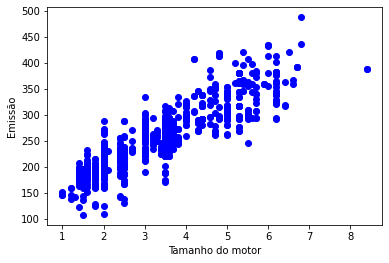

In [99]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão")
plt.show()

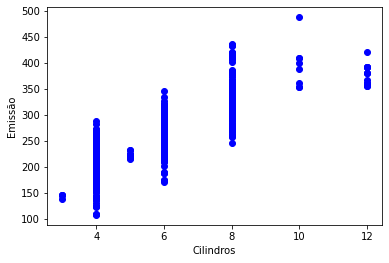

In [92]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Cilindros")
plt.ylabel("Emissão")
plt.show()

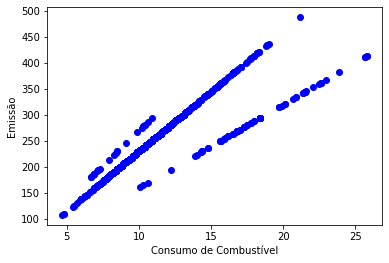

In [93]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Consumo de Combustível")
plt.ylabel("Emissão")
plt.show()

## <h2 id="TT">Treino e teste</h2>


A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, vamos treinar com o conjunto de treinamento e testar com o conjunto de teste.
Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Cerca de 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:

In [94]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Destribuição do treino de dados

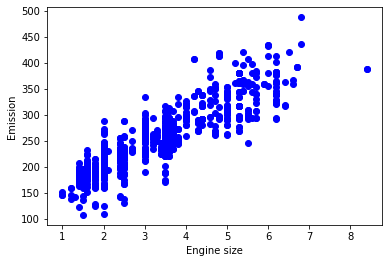

In [95]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## <h2 id="Reg">Criando Modelo de regressão linear múltipla</h2>


Existem múltiplas variáveis que impactam a emissão de CO2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla. Um exemplo de regressão linear múltipla é prever a emissão de CO2 usando como referência os valores do tamanho do motor, número de cilindros e consumo do carro. O modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples. Importante não usarmos muitas colunas de referência no nosso algoritmo, pois isso pode causar overfit que é quando nosso modelo fica ajustado demais e não se torna genérico o suficiente.

In [96]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# Coeficientes
print(f'Coeficientes:  {regr.coef_}')

Coeficientes:  [[12.06741916  6.64079253  9.71798706]]


**Coeficiente** e **Intercecção** são os parâmetros de ajuste da nossa linha.
Dado que se trata de um modelo de regressão linear múltipla com 3 parâmetros e que os parâmetros são o intersecção e os coeficientes do hiperplano, o sklearn pode estimá-los a partir de nossos dados. O Scikit-learn usa o método simples dos Mínimos Quadrados Ordinários para resolver este problema.

#### Mínimos Quadrados Ordinários (OLS)

OLS é um método para estimar os parâmetros desconhecidos em um modelo de regressão linear. O OLS escolhe os parâmetros de uma função linear de um conjunto de variáveis ​​explicativas minimizando a soma dos quadrados das diferenças entre a variável dependente alvo e aquelas previstas pela função linear. Em outras palavras, ele tenta minimizar a soma dos erros quadráticos (SSE) ou erro quadrático médio (MSE) entre a variável de destino (y) e nossa saída prevista ($\hat{y}$) em todas as amostras no conjunto de dados.

OLS pode encontrar os melhores parâmetros usando os seguintes métodos:

* Resolvendo os parâmetros do modelo analiticamente usando equações de forma fechada
* Usando um algoritmo de otimização (Descida Gradiente, Descida Gradiente Estocástica, Método de Newton, etc.)\

## <h2 id="Pred">Predições</h2>

In [97]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
RSQ = np.mean((y_hat - y) ** 2)
VAR = regr.score(x, y)
print('-'*55)
print(f"Residual da soma dos quadrados: {RSQ:.2f}")
print(f'Pontuação de regressão de variância: {VAR:.2f}') # Score de variação - Aonde 1 é uma predição perfeita
print('-'*55)

-------------------------------------------------------
Residual da soma dos quadrados: 495.16
Pontuação de regressão de variância: 0.88
-------------------------------------------------------


c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Pontuação de regressão de variância explicada:**\
Seja $\hat{y}$ a saída-alvo estimada(predição), y a saída-alvo correspondente(valor real) e Var a variância(o quadrado do desvio padrão). Então a variância explicada é estimada da seguinte forma:

$\texttt{Avaliação da Variação}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
A melhor pontuação possível é 1, e os valores mais baixos são piores.

Vamos usar uma regressão linear múltipla com o mesmo conjunto de dados, mas desta vez vamos usar outras características
Tente usar uma regressão linear múltipla com o mesmo conjunto de dados, mas desta vez use FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY em vez de FUELCONSUMPTION_COMB. Isso resulta em melhor precisão?

In [98]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# Coeficientes
print('-'*66)
print(f'Coeficientes:  {regr.coef_}')


y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
RSQ = np.mean((y_hat - y) ** 2)
VAR = regr.score(x, y)
print('-'*66)
print(f"Residual da soma dos quadrados: {RSQ:.2f}")
print(f'Pontuação de regressão de variância: {VAR:.2f}') # Score de variação - Aonde 1 é uma predição perfeita
print('-'*66)



------------------------------------------------------------------
Coeficientes:  [[12.19869662  6.25312785  2.99058777  6.37794444]]
------------------------------------------------------------------
Residual da soma dos quadrados: 496.96
Pontuação de regressão de variância: 0.88
------------------------------------------------------------------


c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Concluímos, que nas duas regressões, o resultado foi próximo a um, ou seja uma predição satisfatória, e que as duas obtiveram resultados próximos, o que é esperado, visto que a segunda regressão, utilizou em fato três características das quais a média deu origem a característica utilizada na primeira regressão.

<hr>